[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1swy-U6YfQuWI2uzDjFuavEz7VGHoQrNl?usp=sharing)

## Data loading and inspection

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/c_wine-clustering.csv'
wine_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
wine_data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Pre-processing and check for missing values

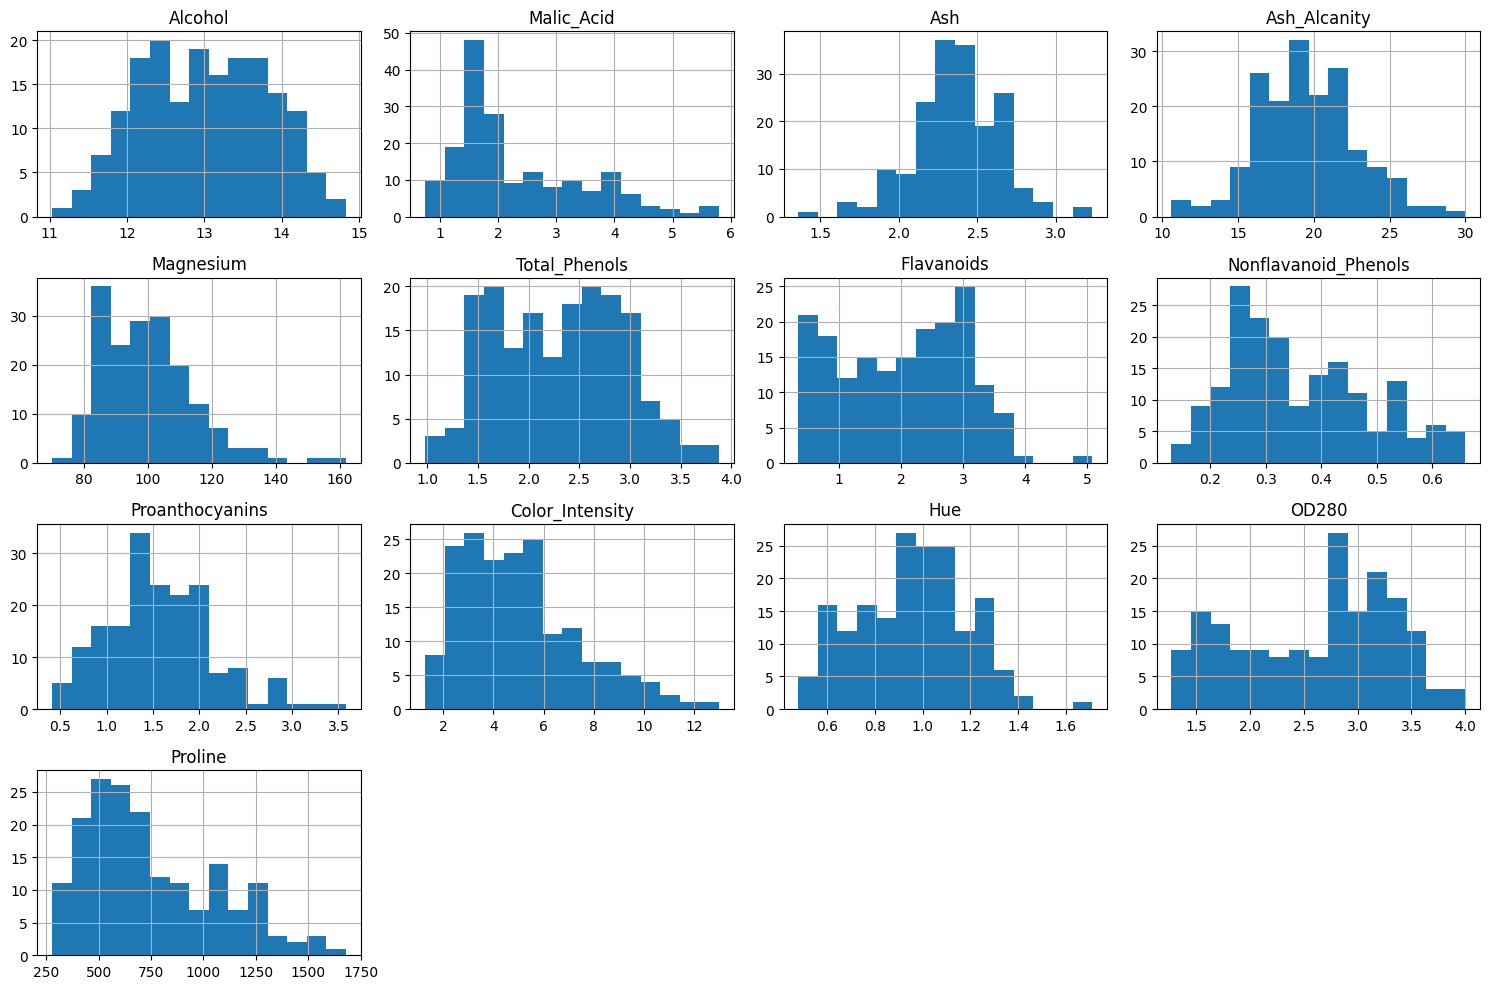

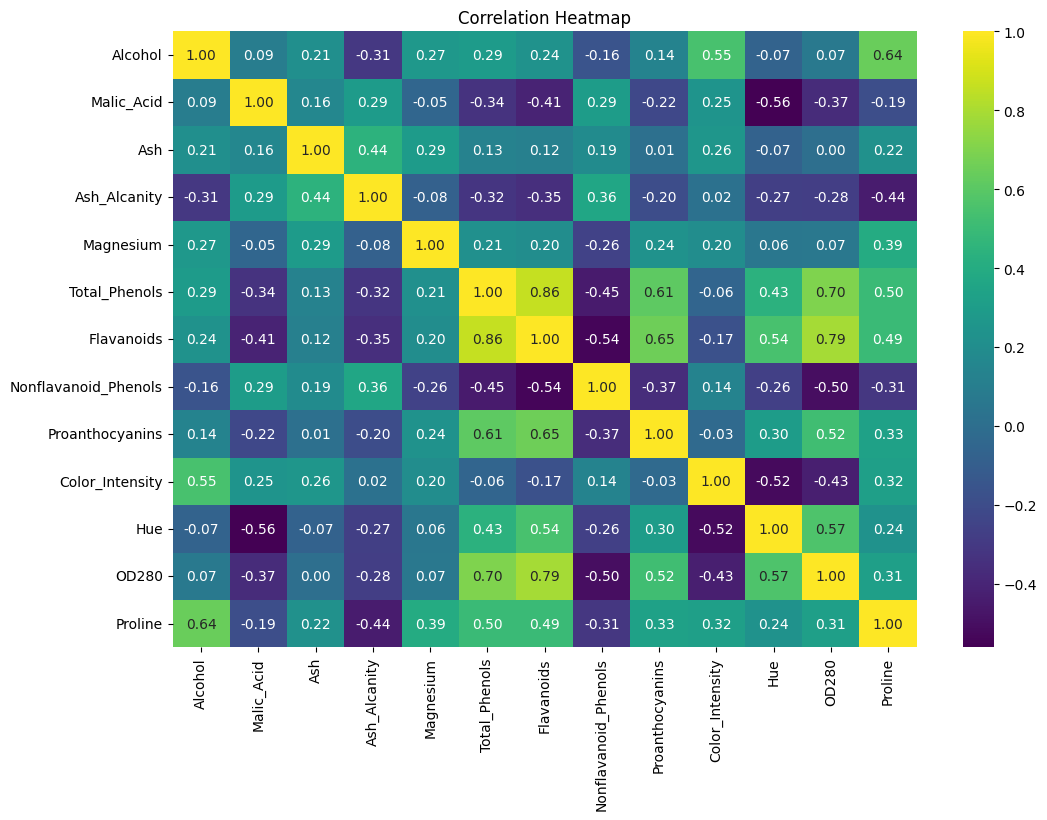

(Alcohol                 0
 Malic_Acid              0
 Ash                     0
 Ash_Alcanity            0
 Magnesium               0
 Total_Phenols           0
 Flavanoids              0
 Nonflavanoid_Phenols    0
 Proanthocyanins         0
 Color_Intensity         0
 Hue                     0
 OD280                   0
 Proline                 0
 dtype: int64,
           Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
 count  178.000000  178.000000  178.000000    178.000000  178.000000   
 mean    13.000618    2.336348    2.366517     19.494944   99.741573   
 std      0.811827    1.117146    0.274344      3.339564   14.282484   
 min     11.030000    0.740000    1.360000     10.600000   70.000000   
 25%     12.362500    1.602500    2.210000     17.200000   88.000000   
 50%     13.050000    1.865000    2.360000     19.500000   98.000000   
 75%     13.677500    3.082500    2.557500     21.500000  107.000000   
 max     14.830000    5.800000    3.230000     30.000000  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = wine_data.isnull().sum()

# Summary statistics of the dataset
summary_stats = wine_data.describe()

# Plotting histograms for each feature to understand their distribution
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plotting a heatmap to understand the correlation between different features
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

missing_values, summary_stats


## Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data)

# Converting the scaled data back to a DataFrame for convenience
wine_scaled_df = pd.DataFrame(wine_scaled, columns=wine_data.columns)

# Displaying the first few rows of the scaled data
wine_scaled_df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Clusters using BIC and AIC

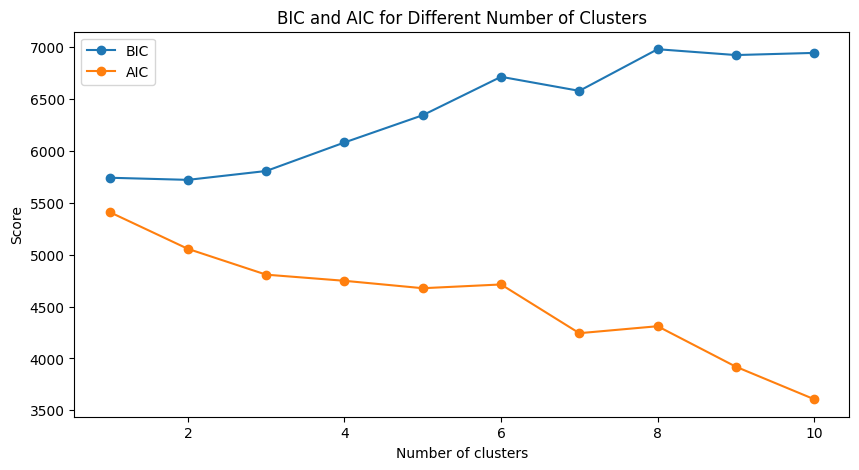

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Determining the optimal number of clusters using BIC and AIC
n_clusters = np.arange(1, 11)
bics = []
aics = []

for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(wine_scaled_df)
    bics.append(gmm.bic(wine_scaled_df))
    aics.append(gmm.aic(wine_scaled_df))

# Plotting BIC and AIC values
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, bics, label='BIC', marker='o')
plt.plot(n_clusters, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Number of Clusters')
plt.legend()
plt.show()


In [ ]:
# Choosing the number of clusters based on the elbow in the BIC and AIC curves
# We select 3 clusters for this case
n_components_optimal = 3

# Creating and fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components_optimal, random_state=42)
gmm.fit(wine_scaled_df)

# Predicting the cluster labels
cluster_labels = gmm.predict(wine_scaled_df)

# Adding the cluster labels to the original dataset for better understanding
wine_data_with_clusters = wine_data.copy()
wine_data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows of the dataset with cluster labels
wine_data_with_clusters.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating pairplot to visualize the clusters
sns.pairplot(wine_data_with_clusters, hue='Cluster', palette='viridis', diag_kind='kde', corner=True)
plt.show()

# Analyzing the properties of each cluster
cluster_summary = wine_data_with_clusters.groupby('Cluster').mean()
cluster_summary['Count'] = wine_data_with_clusters['Cluster'].value_counts()
cluster_summary


Output hidden; open in https://colab.research.google.com to view.

## Dimensionality reduction for visualization

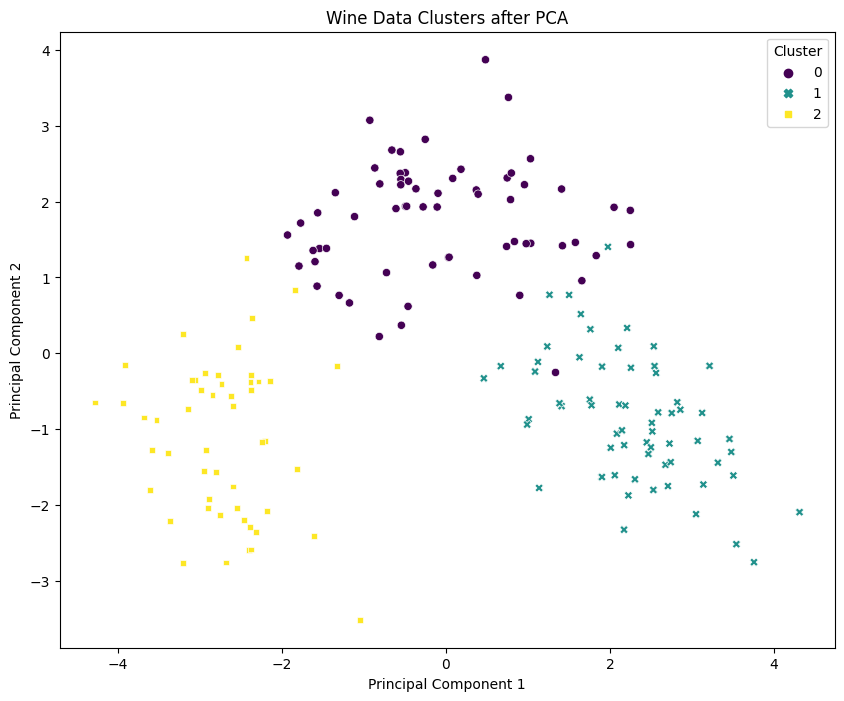

In [ ]:
from sklearn.decomposition import PCA

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled_df)

# Converting to DataFrame for easier plotting
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PCA1', 'PCA2'])
wine_pca_df['Cluster'] = cluster_labels

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=wine_pca_df, style='Cluster')
plt.title('Wine Data Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
